# Data transformation

In [32]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')

# Data handling
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup
import itertools
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import colorlover as cl

In [33]:
diamonds=pd.read_csv('/home/carmencuadrado/Ironhack/ih_datamadpt0420_project_m2/diamonds_supercleaned.csv')

## Categorizing & simplifying numerical variables

In order to make diamonds dataframe more actionable we categorize **Carat** in gradual increasing steps creating the categorical type column *carat_scale*

In addition, we are going to calculate diamonds volume in order to substitude *x ,y & z* by *volume*

In [34]:
diamonds['carat_scale']=diamonds['carat'].apply(lambda x: "0-0.10" if x>0 and x<=0.10 else("0.10-0.25" if x>0.10 and x<=0.25 else ("0.25-0.50" if x>0.25 and x<=0.50 else ("0.50-0.75" if x>0.50 and x<=0.75 else ("0.75-1" if x>0.75 and x<=1 else ("1-1.25" if x >1 and x<=1.25 else ("1.25-1.50" if x>1.25 and x<=1.50 else ("1.50-1.75" if x>1.50 and x<=1.75 else ("1.75-2" if x>1.75 and x<=2 else ("2-2.5" if x>2 and x<=2.5 else ("2.5-3" if x>2.5 and x<3 else ("3-4" if x>3 and x<=4 else "+4"))))))))))))

## Enriching the dataframe

#### Attributing a cut to each diamond

According to its table, depth and length/width ratio each diamond have a different shape. In order to learn more about the diamonds given in this sample, we are going to infer its shape applying tha parameters found at diamonds.pro proportion guide. Those who does not fit into any class would be labelled as "fancy" diamonds

These are the different shapes present in the diamonds sample:

In [35]:
#Web scrapping 
url='https://www.diamonds.pro/guides/diamond-proportion/'
html = requests.get(url).content
soup = BeautifulSoup(html, 'lxml')
diamonds_proportions = soup.find_all('td')
x=diamonds_proportions[10:]

#Adapting what has been scrapped
split = 6
x = [x[i:i + split] for i in range(0, len(x), split)]

lista=[]
for i in range(0, len(x)):
    lista.append(x[i][0])
    lista.append(x[i][1])
    lista.append(x[i][2])
    lista.append(x[i][5])
    
lista2=[]
for i in lista:
    i=re.sub('\<.*?>','',str(i))
    x=re.sub('–\xa0','',str(i))
    x=re.sub('%','',str(i))
    lista2.append(x)
    
lista3=[]
s=4
lista3=[lista2[i:i + s] for i in range(0,len(lista2),s)]

lista4=[]
for i in range(0,len(lista3)):
    lista4.append(lista3[i][0])
    x=re.split('–|;|to',str(lista3[i][1]))
    for a in x:
        lista4.append(a)
    y=re.split('–|;|to',str(lista3[i][2]))
    for b in y:
        lista4.append(b)
    z=re.split('–|;|to',str(lista3[i][3]))
    for c in z:
        lista4.append(c)

lista5=[]
for i in lista4:
    i=re.sub('\xa0','',str(i))
    x=re.sub('&lt','',str(i))
    g=re.sub('\([a-z].*', '', str(x))
    lista5.append(g)
    
lista5=[i for i in lista5 if i]

lista6=[]
sp=7
a=[lista5[0:35][i:i +sp] for i in range(0,len(lista5[0:35]),sp)]
spl=6
b=[lista5[35:47][i:i +spl] for i in range(0,len(lista5[35:47]),spl)]
c=[lista5[47:54][i:i +sp] for i in range(0,len(lista5[47:54]),sp)]
d=lista5[54:60]
e=lista5[60:]

for i in a:
    lista6.append(i)
for i in b:
    lista6.append(i)
for i in c:
    lista6.append(i)
lista6.append(d)
lista6.append(e)

#Creating a parameter that would help us to identify diamonds' shape
diamonds['L/Wratio']=diamonds['x']/diamonds['y']

#stablishing the conditions of each shape
a=lista6[0]
b=lista6[1]
c=lista6[2]
d=lista6[3]
e=lista6[4]
f=lista6[5]
g=lista6[6]
h=lista6[7]
i=lista6[8]
j=lista6[9]

round1=diamonds['depth']>=float(a[1])
round2=diamonds['depth']<=float(a[2])
round3=diamonds['table']>=float(a[3])
round4=diamonds['table']<=float(a[4])
round5=diamonds['L/Wratio']>=float(a[5])
round6=diamonds['L/Wratio']<=float(a[6])
r=diamonds[round1&round2&round3&round4&round5&round6]

princess1=diamonds['depth']>=float(b[1])
princess2=diamonds['depth']<=float(b[2])
princess3=diamonds['table']>=float(b[3])
princess4=diamonds['table']<=float(b[4])
princess5=diamonds['L/Wratio']>=float(b[5])
princess6=diamonds['L/Wratio']<=float(b[6])
p=diamonds[princess1&princess2&princess3&princess4&princess5&princess6]

cushion1=diamonds['depth']>=float(c[1])
cushion2=diamonds['depth']<=float(c[2])
cushion3=diamonds['table']<=float(c[3])
cushion5=diamonds['L/Wratio']>=float(c[4])
cushion6=diamonds['L/Wratio']<=float(c[5])
cs=diamonds[cushion1&cushion2&cushion3&cushion5&cushion6]

cushion7=diamonds['L/Wratio']>=1.15
cushion8=diamonds['L/Wratio']<=float(c[6])
cu=diamonds[cushion1&cushion2&cushion3&cushion7&cushion8]

emerald=diamonds['depth']>=float(d[1])
emerald2=diamonds['depth']<=float(d[2])
emerald3=diamonds['table']>=float(d[3])
emerald4=diamonds['table']<=float(d[4])
emerald5=diamonds['L/Wratio']>=float(d[5])
emerald6=diamonds['L/Wratio']<=float(d[6])
em=diamonds[emerald&emerald2&emerald3&emerald4&emerald5&emerald6]

asscher=diamonds['depth']>=float(e[1])
asscher2=diamonds['depth']<=float(e[2])
asscher3=diamonds['table']>=float(e[3])
asscher4=diamonds['table']<=float(e[4])
asscher5=diamonds['L/Wratio']>=float(e[5])
asscher6=diamonds['L/Wratio']<=float(e[6])
ass=diamonds[asscher&asscher2&asscher3&asscher4&asscher5&asscher6]

oval=diamonds['depth']<=float(f[1])
oval3=diamonds['table']>=float(f[2])
oval4=diamonds['table']<=float(f[3])
oval5=diamonds['L/Wratio']>=float(f[4])
oval6=diamonds['L/Wratio']<=float(f[5])
o=diamonds[oval&oval3&oval4&oval5&oval6]

pear=diamonds['depth']<=float(g[1])
pear3=diamonds['table']>=float(g[2])
pear4=diamonds['table']<=float(g[3])
pear5=diamonds['L/Wratio']>=float(g[4])
pear6=diamonds['L/Wratio']<=float(g[5])
pe=diamonds[pear&pear3&pear4&pear5&pear6]

radiant=diamonds['depth']<=float(h[1])
radiant3=diamonds['table']>=float(h[2])
radiant4=diamonds['table']<=float(h[3])
radiant5=diamonds['L/Wratio']>=float(h[4])
radiant6=diamonds['L/Wratio']<=float(h[5])
ra=diamonds[radiant&radiant3&radiant4&radiant5&radiant6]

radiant1=diamonds['depth']<=float(h[1])
radiant13=diamonds['table']>=float(h[2])
radiant14=diamonds['table']<=float(h[3])
radiant15=diamonds['L/Wratio']>=1.20
radiant16=diamonds['L/Wratio']<=float(h[6])
rad=diamonds[radiant1&radiant13&radiant14&radiant15&radiant16]

heart=diamonds['depth']>=float(i[1])
heart2=diamonds['depth']<=float(i[2])
heart3=diamonds['table']>=float(i[3])
heart4=diamonds['table']<=float(i[4])
heart5=diamonds['L/Wratio']==float(i[5])
he=diamonds[heart&heart2&heart3&heart4&heart5]

marquise=diamonds['depth']>=float(j[1])
marquise2=diamonds['depth']<=float(j[2])
marquise3=diamonds['table']>=float(j[3])
marquise4=diamonds['table']<=float(j[4])
marquise5=diamonds['L/Wratio']>=float(j[5])
marquise6=diamonds['L/Wratio']<=float(j[6])
m=diamonds[marquise&marquise2&marquise3&marquise4&marquise5&marquise6]

diamonds['shape']=np.where(diamonds.index.isin(r.index), a[0], 'Fancy')
diamonds.loc[diamonds.index.isin((p.index)), 'shape'] = b[0]
diamonds.loc[diamonds.index.isin((cs.index)), 'shape'] = c[0]
diamonds.loc[diamonds.index.isin((cu.index)), 'shape'] = c[0]
diamonds.loc[diamonds.index.isin((em.index)), 'shape'] = d[0]
diamonds.loc[diamonds.index.isin((ass.index)), 'shape'] = e[0]
diamonds.loc[diamonds.index.isin((o.index)), 'shape'] = f[0]
diamonds.loc[diamonds.index.isin((pe.index)), 'shape'] = g[0]
diamonds.loc[diamonds.index.isin((ra.index)), 'shape'] = h[0]
diamonds.loc[diamonds.index.isin((rad.index)), 'shape'] = h[0]
diamonds.loc[diamonds.index.isin((he.index)), 'shape'] = i[0]
diamonds.loc[diamonds.index.isin((m.index)), 'shape'] = j[0]

diamonds['shape'].unique()

diamonds['carat_scale'] = pd.Categorical(diamonds['carat_scale'], categories=["0-0.10","0.10-0.25","0.25-0.50","0.50-0.75","0.75-1","1-1.25","1.25-1.50","1.50-1.75","1.75-2","2-2.5","2.5-3","3-4","+4"], ordered=True)
diamonds=diamonds.sort_values(by='carat_scale')

diamonds['volume']=diamonds['x']*diamonds['y']*diamonds['z']

It is conspicuous how **Fancy-shaped diamonds have a higher price at any carat scale point but in the lower ones** - less that 0.50. According to the experts, the most distinguished diamonds houses prioritized other qualities to carat, therefore, **those diamonds high prices with low carat could be diamonds whose carat has been sacrified for a top quality/traditional cut** 

In [36]:
pd.pivot_table(diamonds, values='price', index=['carat_scale'],

                    columns=['shape'], aggfunc=np.mean)

shape        Asscher Cut   Cushion Cut  Emerald Cut         Fancy  \
carat_scale                                                         
0.10-0.25            NaN    548.333333          NaN    504.298279   
0.25-0.50        1166.00    926.212692          NaN    815.530371   
0.50-0.75            NaN   2065.973371          NaN   2204.638302   
0.75-1           2271.25   3852.696746          NaN   4085.611769   
1-1.25           3597.00   5694.825986          NaN   6326.474124   
1.25-1.50        2596.00   8148.758887          NaN   9066.817116   
1.50-1.75            NaN  10744.809091       8133.0  11265.940887   
1.75-2               NaN  12700.397590          NaN  14056.801282   
2-2.5                NaN  14418.764602          NaN  15464.452229   
2.5-3                NaN  16001.594595          NaN  16271.692308   
3-4                  NaN  14249.800000          NaN  16036.800000   
+4                   NaN  14004.333333          NaN  16970.000000   

shape        Heart Shape  Pear Shape   Radiant Cut  Round Brilliant Cut  
carat_scale                                                              
0.10-0.25            NaN         NaN    499.125000           464.333333  
0.25-0.50         1108.0         NaN    940.588757           994.061889  
0.50-0.75         1421.0         NaN   2045.081967          2107.159817  
0.75-1            6720.0         NaN   3872.787736          3823.931034  
1-1.25            6969.0      6115.0   4982.342246          6045.826840  
1.25-1.50            NaN         NaN   7930.234234          8661.300000  
1.50-1.75            NaN      7188.0   9831.130137         10788.474576  
1.75-2               NaN         NaN  13155.470588         12821.500000  
2-2.5                NaN         NaN  14345.453782         14851.076923  
2.5-3                NaN         NaN  14440.071429         12375.000000  
3-4                  NaN         NaN  14677.000000                  NaN  
+4                   NaN         NaN  14659.500000                  NaN

In order to visualize it, we plot the distribution of diamonds in price regarding their carat. The color indicates its carat-scale and its size is determined by its volume

In [37]:
fig = px.scatter(diamonds.query("carat>0"), x="price", y="shape", size="volume", color="carat_scale",
           hover_name="carat_scale", log_x=True, size_max=60, title='Shape vs Price under carat light')
fig.show()

#### Matching each diamonds with a potential client

The following web pages from top luxury jewelry brands reveals the 4Cs standards of each of these top brands. Regarding this information we are going to classify our diamonds according each client standards, attributing a potential client to each of our diamonds. It is important to note that diamonds complying with the standards of the first potential clients, should be accepted by those of the bottom of the list who are less demanding and offer diamonds to a broader public

- Harry Winston: https://www.harrywinston.com/en/our-diamonds
- Cartier: https://www.cartier.com/en-us/collections/engagement/features/cartier-diamonds.html
- Van Cleef & Arpels: No information
- Buccellati:https://buccellati.com/en/4cs?
- Tiffany & Co.: https://www.tiffany.com/engagement/the-tiffany-guide-to-diamonds/
- Graff:https://www.graff.com/bridal/bridal-guides/the-4cs/
- Piaget: https://www.piaget.com/es-es/craftsmanship/diamonds
- Bvlgari: https://www.bulgari.com/en-int/engagement-and-wedding/bridal-jewelry/diamond-guide-gia-certificate.html
- Chopard:https://www.chopard.com/intl/chopard-diamonds

This is the outcome of the classification process:

In [38]:
hw_color=['D','E','F']
hw_clarity=['IF', 'VVS1', 'VVS2']
hw_cut=['Ideal','Premium']

c_color=['D','E','F','G','H']
c_clarity=['IF', 'VVS1', 'VVS2']
c_cut=['Ideal','Premium', 'Very good']

b_color=['D','E','F']
b_clarity=['IF', 'VVS1', 'VVS2']
b_cut=['Ideal','Premium', 'Very good']

t_color=['D','E','F','G','H','I']
t_clarity=['VS2', 'VS1', 'IF', 'VVS1', 'VVS2']
t_cut=['Ideal','Premium']

g_color=['D','E','F','G']
g_clarity=['VS2', 'VS1', 'IF', 'VVS1', 'VVS2']
g_cut=['Ideal','Premium', 'Very good']

p_color=['D','E','F']
p_clarity=['IF', 'VVS1', 'VVS2']
p_cut=['Ideal','Premium', 'Very good', 'Good']

bu_color=['D','E','F','G','H']
bu_clarity=['VS2', 'VS1', 'IF', 'VVS1', 'VVS2']
bu_cut=['Ideal','Premium', 'Very good']

ch_clarity=['VS2', 'VS1', 'IF', 'VVS1', 'VVS2']
ch_color=['D','E','F','G']
ch_cut=['Ideal','Premium']

condiciones = [diamonds.color.isin(hw_color) & diamonds.clarity.isin(hw_clarity) & diamonds.cut.isin(hw_cut),
               diamonds.color.isin(c_color) & diamonds.clarity.isin(c_clarity) & diamonds.cut.isin(c_cut),
               diamonds.color.isin(b_color) & diamonds.clarity.isin(b_clarity) & diamonds.cut.isin(b_cut),
               diamonds.color.isin(t_color) & diamonds.clarity.isin(t_clarity) & diamonds.cut.isin(t_cut),
               diamonds.color.isin(g_color) & diamonds.clarity.isin(g_clarity) & diamonds.cut.isin(g_cut),
               diamonds.color.isin(p_color) & diamonds.clarity.isin(p_clarity) & diamonds.cut.isin(p_cut),
               diamonds.color.isin(bu_color) & diamonds.clarity.isin(bu_clarity) & diamonds.cut.isin(bu_cut),
               diamonds.color.isin(ch_color) & diamonds.clarity.isin(ch_clarity) & diamonds.cut.isin(ch_cut)]
elecciones = ['Harry Winston', 'Cartier','Buccellati','Tiffany & Co', 'Graff','Piaget', 'Bulgari', 'Chopard']
diamonds["Potential Client"] = np.select(condiciones, elecciones, default="Other")

In [39]:
print( 'Potential Clients:', diamonds["Potential Client"].unique())

Potential Clients: ['Piaget' 'Other' 'Tiffany & Co' 'Harry Winston' 'Cartier']


Being **Harry Winston's diamonds those who can be sold at a best price at any carat scale** but the first. Followed close by Cartier and Piaget. **Tiffany & Co seems to be the top brand less exclusive in carat scale terms, therefore, playing in over-1.75-carat-scale diamonds market** beating Other brands. **Not potentitally branded diamonds are the worst paid** and those who reach higher carat scales

In [40]:
pd.pivot_table(diamonds, values='price', index=['carat_scale'],

                    columns=['Potential Client'], aggfunc=np.mean)

Potential Client       Cartier  Harry Winston         Other        Piaget  \
carat_scale                                                                 
0.10-0.25           538.307692     638.463768    489.599462    485.696970   
0.25-0.50           953.626276    1083.679100    769.307298   1017.613636   
0.50-0.75          2342.033268    3047.478070   2019.204003   2922.133333   
0.75-1             5437.594203    7360.586957   3831.285790   8096.823529   
1-1.25             8896.684746   11196.631579   5260.480462   9986.526316   
1.25-1.50         11687.120000   15558.862069   7727.865685  15089.666667   
1.50-1.75         14999.783784   17681.333333   9987.263811           NaN   
1.75-2                     NaN            NaN  13028.727848           NaN   
2-2.5                      NaN            NaN  14777.481957           NaN   
2.5-3                      NaN            NaN  15565.169231           NaN   
3-4                        NaN            NaN  14694.772727           NaN   
+4                         NaN            NaN  14702.625000           NaN   

Potential Client  Tiffany & Co  
carat_scale                     
0.10-0.25           464.084507  
0.25-0.50           846.543115  
0.50-0.75          2232.042130  
0.75-1             4414.054628  
1-1.25             7028.805399  
1.25-1.50         10088.437340  
1.50-1.75         12985.452188  
1.75-2            15397.043478  
2-2.5             16747.197802  
2.5-3             18766.000000  
3-4                        NaN  
+4                         NaN

Once we know which ones are the most valuable diamonds, we move forward to visualize what is the potential of our diamonds sample in economic terms concluding that
- **Most of the diamonds are not potentially sold to top brands**, specifically, 24.758(61,23%)
- **Tiffany & Co could be our potential best client**, because of the amount of diamonds of our sample that fits its requirements 10.415 (25,75%) and considering that **it would be the last opportunity for top diamonds rejected by Cartier or Harry Winston to make their way into a branded top firm**, even though
- **Cartier (2.631 - 6,5%) and Harry Winston (2.443 - 6,05%) would definitely be our most profitable clients**, while
- **Piaget (190 - 0,47%) could become a not relevant target** if it rejects the top diamonds not wanted by Cartier or Harry Winston

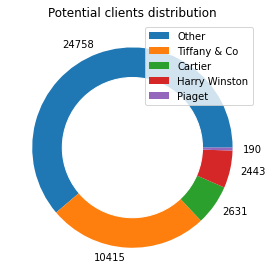

In [41]:
# your code here
colors = ['#ff9999','#66b3ff','#99ff99']
 
# create data
size_of_groups=diamonds['Potential Client'].value_counts()
df = size_of_groups.rename_axis('size_of_groups').reset_index(name='counts')
df.replace({1:'Harry Winston',2:'Tiffany & Co',3:'Cartier',4:'Piaget',5:'Other'}, inplace=True)

# Create a pieplot
plt.pie(size_of_groups, labels=df['counts'])
plt.legend(df['size_of_groups'])
plt.title('Potential clients distribution')
plt.tight_layout()

# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

As ([Business insider](https://www.businessinsider.com/rich-millennials-redefining-luxury-experiences-fashion-influencers-2019-4?IR=T#they-spend-extra-on-vip-experiences-1)) mentions, millenials; the consumers of the future, are spending more on experiences than things. Therefore, when they look for a good to buy they demand exclusivity and customization, consequently, fancy-non-standardized diamonds may offer the singularity they are looking for rather that those fitting an specific shape, or at least, that should be our selling argument for selling the massive amount of fancy shaped diamonds present in the sample

In [28]:
Shape_per_client = pd.pivot_table(
    diamonds,
    index = 'Potential Client',
    columns = 'shape',
    values = 'Price index',
    aggfunc = 'count',fill_value=0
)

category_order = [
    'Round Brilliant Cut',
    'Cushion Cut',
    'Asscher Cut',
    'Emerald Cut',
    'Heart Shape',
    'Pear Shape',
    'Radiant Cut',
    'Fancy'
]

fig = go.Figure()

for column in Shape_per_client.columns:
    fig.add_trace(go.Bar(
        x = Shape_per_client[column],
        y = Shape_per_client.index,
        name = column,
        orientation = 'h',
        marker_color = cl.scales[str(len(category_order))]['div']['RdYlGn'][category_order.index(column)],
    ))

fig.update_layout(
    barmode = 'relative',
    title = 'Diamonds shape per Potential Client'
)
fig.show()

## Ranking diamonds

Now we know and have enrinched our data frame we are ready to rank diamonds according to its quality

Starting sorting by numerical variables, we are going to prioritize by

- Carat_scale
- Volume

In [42]:
diamonds.drop(columns=['x','y','z'], inplace=True)

In [43]:
diamonds_s=diamonds.sort_values(['carat_scale','volume'],ascending=(False,False))
diamonds_s.head()

carat        cut color clarity  depth  table  price carat_scale  \
31068   4.50       Fair     J      I1   65.8   58.0  18531          +4   
27879   4.13       Fair     H      I1   64.8   61.0  17329          +4   
3467    4.01    Premium     I      I1   61.0   61.0  15223          +4   
23598   4.01    Premium     J      I1   62.5   62.0  15223          +4   
1143    3.00  Very Good     H      I1   63.1   55.0   6512          +4   

       L/Wratio        shape      volume Potential Client  
31068  1.006890  Cushion Cut  698.455296            Other  
27879  1.015228  Radiant Cut  633.355000            Other  
3467   1.003960  Radiant Cut  631.894380            Other  
23598  1.008048  Radiant Cut  621.496512            Other  
1143   1.014286  Cushion Cut  484.639610            Other

Continuing sorting by categorical variables, we are going to prioritize by

- Clarity
- Color
- Cut

In [44]:
diamonds['cut'] = pd.Categorical(diamonds['cut'], ["Fair", "Good","Very Good","Premium","Ideal"])
diamonds['clarity'] = pd.Categorical(diamonds['clarity'], ["I1", "I2","I3","SI1","SI2","VS1","VS2","VVS1","VVS2","IF"])
diamonds['color'] = pd.Categorical(diamonds['color'], ["I","J","H","G","F","E","D"])

In [45]:
diamonds_s=diamonds.sort_values(['clarity','color','cut'],ascending=(False,False,False))
diamonds_s.head()

carat    cut color clarity  depth  table  price carat_scale  L/Wratio  \
36079   0.34  Ideal     D      IF   62.1   57.0   2346   0.25-0.50  1.013453   
12553   0.31  Ideal     D      IF   61.1   56.0   1310   0.25-0.50  1.006834   
26097   0.31  Ideal     D      IF   61.1   56.0   1251   0.25-0.50  0.993213   
26752   0.34  Ideal     D      IF   59.8   57.0   2287   0.25-0.50  0.995643   
31224   0.34  Ideal     D      IF   62.1   57.0   2287   0.25-0.50  0.986726   

             shape     volume Potential Client  
36079  Cushion Cut  56.244168    Harry Winston  
12553  Cushion Cut  52.196222    Harry Winston  
26097        Fancy  52.196222    Harry Winston  
26752        Fancy  57.475062    Harry Winston  
31224        Fancy  56.244168    Harry Winston

In both cases, our sorting methods yield similar dataframes. However, when we sort by price the outcome has nothing to do with a categorization according to diamond quality

In [46]:
diamonds_s.sort_values(['price'],ascending=False).head()

carat        cut color clarity  depth  table  price carat_scale  \
7031    2.29    Premium     I     VS2   60.8   60.0  18823       2-2.5   
3988    2.00  Very Good     G     SI1   63.5   56.0  18818      1.75-2   
29092   1.51      Ideal     G      IF   61.7   55.0  18806   1.50-1.75   
25517   2.29    Premium     I     SI1   61.8   59.0  18797       2-2.5   
618     2.00    Premium     I     VS1   60.8   59.0  18795      1.75-2   

       L/Wratio        shape      volume Potential Client  
7031   1.003542        Fancy  371.494200     Tiffany & Co  
3988   0.991217        Fancy  317.333520            Other  
29092  0.994602        Fancy  249.029352          Cartier  
25517  1.008284  Cushion Cut  377.248560            Other  
618    1.013716        Fancy  320.144766     Tiffany & Co

Having a look to the correlation of the new variables volume and L/Wratio to price, we could see how volume has a positively-close-to-one correlation relationship with price while L/Wratio has an irrelevant correlation. Consecuently, we are going to take volume into consideration for the final sorting, while L/Wratio will be dismissed

In [47]:
diamonds.corr()

carat     depth     table     price  L/Wratio    volume
carat     1.000000  0.026856  0.182969  0.921862  0.148321  0.998978
depth     0.026856  1.000000 -0.293246 -0.014695  0.057821  0.009251
table     0.182969 -0.293246  1.000000  0.129665  0.141961  0.173597
price     0.921862 -0.014695  0.129665  1.000000  0.094292  0.923932
L/Wratio  0.148321  0.057821  0.141961  0.094292  1.000000  0.139437
volume    0.998978  0.009251  0.173597  0.923932  0.139437  1.000000

We will keep a price index in order to see how it differs from the diamonds quality ranking we yield

In [48]:
diamonds=diamonds.sort_values(['price'],ascending=False).reset_index()
diamonds.drop(columns='index', inplace=True)

In [49]:
diamonds=diamonds.reset_index()

In [50]:
diamonds.rename(columns={'index':'Price index'}, inplace=True)
diamonds.head()

Price index  carat        cut color clarity  depth  table  price  \
0            0   2.29    Premium     I     VS2   60.8   60.0  18823   
1            1   2.00  Very Good     G     SI1   63.5   56.0  18818   
2            2   1.51      Ideal     G      IF   61.7   55.0  18806   
3            3   2.29    Premium     I     SI1   61.8   59.0  18797   
4            4   2.04    Premium     H     SI1   58.1   60.0  18795   

  carat_scale  L/Wratio        shape      volume Potential Client  
0       2-2.5  1.003542        Fancy  371.494200     Tiffany & Co  
1      1.75-2  0.991217        Fancy  317.333520            Other  
2   1.50-1.75  0.994602        Fancy  249.029352          Cartier  
3       2-2.5  1.008284  Cushion Cut  377.248560            Other  
4       2-2.5  1.010870        Fancy  335.429424            Other

Definitely sorting by numerical & categorical variables in this order:

- Clarity
- Color
- Carat_scale
- Volume
- Cut

In [51]:
diamonds=diamonds.sort_values(['clarity','color','carat_scale','volume','cut'],ascending=(False,False,False,False,False)).reset_index()
diamonds.drop(columns='index', inplace=True)

In [52]:
diamonds=diamonds.reset_index()

In [53]:
diamonds.rename(columns={'index':'Quality index'}, inplace=True)
diamonds.head()

Quality index  Price index  carat        cut color clarity  depth  table  \
0              0          195   1.14  Very Good     D      IF   59.1   58.0   
1              1          722   1.09       Good     D      IF   58.7   61.0   
2              2          519   1.07      Ideal     D      IF   60.9   54.0   
3              3          137   1.07    Premium     D      IF   60.9   58.0   
4              4          193   1.07  Very Good     D      IF   60.9   58.0   

   price carat_scale  L/Wratio  shape      volume Potential Client  
0  18112      1-1.25  0.989855  Fancy  191.335620            Other  
1  16406      1-1.25  0.985401  Fancy  184.487625           Piaget  
2  17042      1-1.25  0.989599  Fancy  182.872944    Harry Winston  
3  18279      1-1.25  1.015221  Fancy  176.602257    Harry Winston  
4  18114      1-1.25  0.985007  Fancy  176.602257            Other

In [54]:
diamonds['ranking_difference']=diamonds['Price index']-diamonds['Quality index']

Looking at the difference between the Price ranking and the Quality ranking, we come to the conclusion that they are not aligned and for that reason, we should reassess out valuation process

In [55]:
diamonds['ranking_difference'].unique()

array([   195,    721,    517, ..., -17200, -13485, -11209])

In [56]:
diamonds.to_csv(r'/home/carmencuadrado/Ironhack/ih_datamadpt0420_project_m2/diamonds_result.csv', index=False)

In [57]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')